In [1]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
import datetime

t = datetime.datetime
tunit_JST = "days since 1968-05-23 09:00:00 GMT"

ncfile = '/Users/teruhisa/Dropbox/Data/ob500_river_2012_fennelP-3.nc'
nc = netCDF4.Dataset(ncfile, 'r')
time = nc.variables['river_time_hourly'][:]
time = netCDF4.num2date(time, tunit_JST)
q = nc.variables['river_transport'][:,:]
yodo = q[:,6]
yamato = q[:,11]

(734716.0, 734747.0)

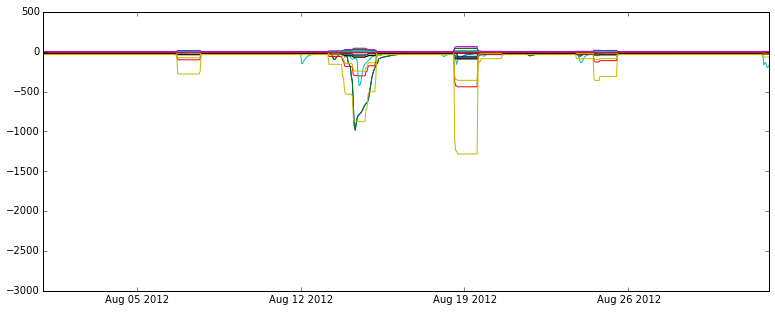

In [4]:
fig, ax = plt.subplots(1,1, figsize=[13,5])
for i in range(34):
    ax.plot(time, q[:,i])
#ax.plot([t(2012,6,20,3,16,0),t(2012,6,20,3,16,0)], [-200,0], 'k-')
ax.set_xlim(t(2012,8,1,0),t(2012,9,1,0))
#ax.set_ylim(-200,0)

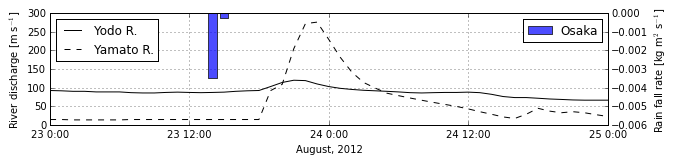

In [14]:
fig, ax = plt.subplots(1,1,figsize=[10,2])
ax2 = ax.twinx()

ax.plot(time-60, -yodo*2, 'k-', label='Yodo R.')
ax.plot(time-60, -yamato*2, 'k--', label='Yamato R.')
ax.set_xlim(23,25)
ax.set_ylim(0,300)
ax.set_xticklabels(['23 0:00','23 12:00','24 0:00','24 12:00','25 0:00'])
ax.set_xlabel('August, 2012')
ax.set_ylabel("River discharge [m s$^{-1}$]")
ax.grid()
ax.legend(loc=2)

ax2.bar(rtime-61, -rain, align='center', width=0.03, alpha=0.7, label='Osaka')
ax2.set_ylim(-0.006, 0)
ax2.set_ylabel('Rain fall rate [kg m$^{2}$ s$^{-1}$]')
ax2.legend(loc=1)

In [8]:
plt.savefig('check_river_rain.png', bbox_inches='tight')

In [12]:
plt.show(fig)